In [1]:
import numpy as np
from matplotlib import pyplot as plt

schemes = ["NegotiaToR", "VLB"]

# workloads = ["incast_degree2", "incast_degree5", "incast_degree10", "incast_degree15", "incast_degree20"]
# labels = [2, 5, 10, 15, 20]
workloads = ["permutation_size1", "permutation_size3", "permutation_size5", "permutation_size10", "permutation_size25", "permutation_size30", "permutation_size50", "permutation_size100", "permutation_size300", "permutation_size500"]
# labels = [1, 3, 5, 10, 30, 50, 100]
labels = [1, 3, 5, 10, 25, 30, 50, 100, 300, 500]

workloads = ["permutation_size1", "permutation_size5", "permutation_size30", "permutation_size100", "permutation_size500"]
labels = [1, 5, 30, 100, 500]
myfontsize = 40

# load = 'Pureincast'
load = 'Permutation'
group = 1
data = np.zeros([2 * group, len(workloads)], dtype = float) 
for i, scheme in enumerate(schemes): 
    for group_index in range(group):  
        for j, workload in enumerate(workloads):
        
            dir_name = "../DATA/Count_BW_13/" + scheme + "_" + load + "/" + str(group_index) + "/DATA_vote_" + workload
            # file_name = dir_name + "/GOODPUT.txt"
            # data[i][j] = np.loadtxt(file_name, usecols=(1,))[73]
            file_name = dir_name + "/FCT.txt"
            tmp = np.loadtxt(file_name)
            # print(tmp[4:5, :])
            # data[i][j] = np.mean(8*tmp[:, 4:5] / tmp[:,7:8]) / 1e9
            incast_finish_time = max(tmp[:, 7:8])
            # print(incast_finish_time)
            first_index = int(10*1000/13)
            last_index = first_index + int(incast_finish_time / 13 * 1e9)
            # print(first_index)
            # print(last_index)
            file_bandwidth = dir_name + "/RECEIVER_BANDWIDTH.txt"            
            bandwidth = np.loadtxt(file_bandwidth, usecols=(73,))
            data[i * group + group_index][j] = np.sum(bandwidth[first_index:last_index]) * 8 / (incast_finish_time) / 1e9
            # file_bandwidth = dir_name + "/GOODPUT.txt"
            # bandwidth = np.loadtxt(file_bandwidth, usecols=(1,))
            # data[i * group + group_index][j] = np.mean(bandwidth)
            

# print(data)


In [2]:

data1 = data[0:group, :]
data2 = data[group:2*group, :]

data1_average = np.average(data1, axis=0)
data2_average = np.average(data2, axis=0)
# print(result1_average)
# print(result2_average)
data1_stdd = np.std(data1,axis=0)
data2_stdd = np.std(data2,axis=0)
# print(data1_stdd)
# print(data2_stdd)
print(data)

[[132.07684353 152.15732365 211.64044006 380.59666437 474.47312647]
 [ 44.13084928 101.75823567 130.81171515 109.31660478  84.28281999]]


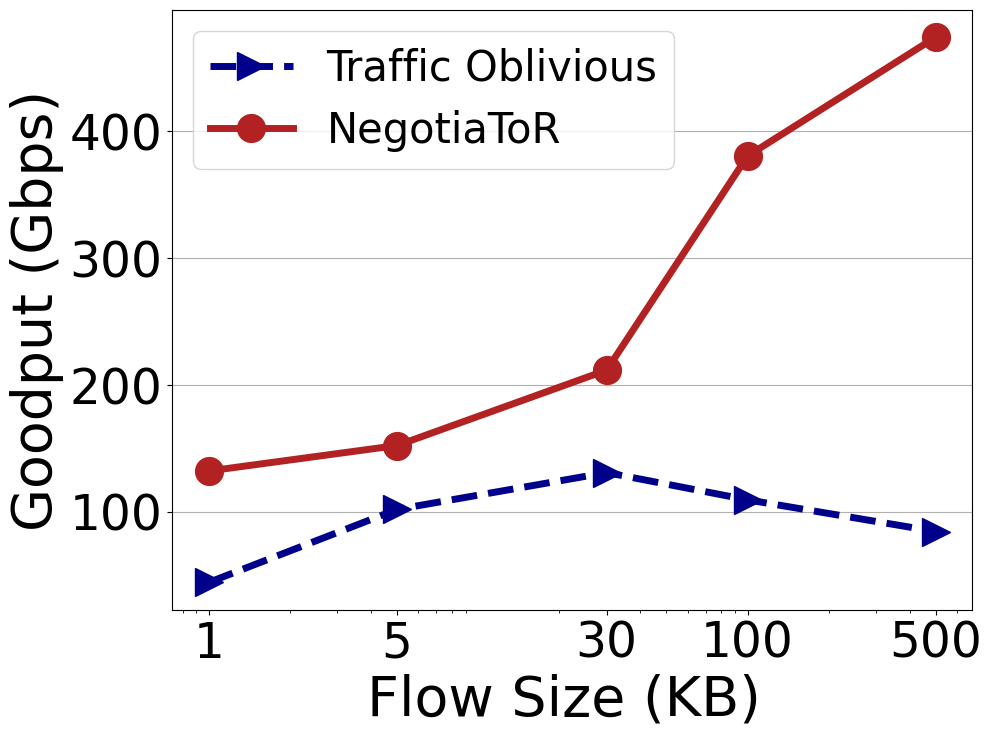

In [2]:

plt.figure(figsize=(10, 8))
plt.plot(labels, data[1], color = 'darkblue', marker = '>', markersize=20, linestyle = '--', linewidth=5, label = "Traffic Oblivious")
plt.plot(labels, data[0], color = 'firebrick', marker = 'o', markersize=20, linestyle = 'solid', linewidth=5, label = "NegotiaToR")
# plt.errorbar(labels,data2_average,yerr=data1_stdd,fmt='>--',ecolor='darkblue',color='darkblue', markersize=20, elinewidth=5,linewidth=5,capsize=20,label = "Traffic Oblivious")
# plt.errorbar(labels,data1_average,yerr=data2_stdd,fmt='o-',ecolor='firebrick',color='firebrick', markersize=20, elinewidth=5,linewidth=5,capsize=20,label = "NegotiaToR")
plt.xlabel("Flow Size (KB) ", fontsize=myfontsize)
plt.ylabel("Goodput (Gbps)", fontsize=myfontsize)
# plt.xlim([0,100])
plt.xscale('log')
# plt.xticks([1, 15, 100, 3, 5, 30, 50], (r"$10^0$", 15, r"$10^2$", 3, 5, 30, 50), fontsize=myfontsize-5)
# plt.xticks([3, 5, 30, 50], (3, 5, 30, 50), fontsize=myfontsize-5)
plt.xticks([1, 5, 30, 100, 500], (1, 5, 30, 100, 500), fontsize=myfontsize-5)
# plt.ylim([0,220])
plt.yticks(fontsize=myfontsize-5)
plt.grid(axis='y')
plt.legend(loc = 'upper left', fontsize=myfontsize-10)
# plt.title("Permutation", fontsize=myfontsize)

plt.subplots_adjust(left=0.16, right=0.96, bottom=0.15, top=0.9)

plt.savefig("../FIGS/NegotiaToR Figs/5/permutation-throughput.pdf")

In [3]:
import numpy as np
from matplotlib import pyplot as plt

schemes = ["NegotiaToR", "VLB"]


workloads = ["permutation_size1", "permutation_size5",  "permutation_size30", "permutation_size100", "permutation_size500"]
# workloads = ["permutation_size1", "permutation_size3",  "permutation_size5", "permutation_size100", "permutation_size500"]
# workloads = ["permutation_size5"]
labels = [1, 5, 30, 100, 500]
myfontsize = 40

load = 'Permutation'

group = 1
result = np.zeros([2 * group, len(workloads)], dtype = float) 

for i, scheme in enumerate(schemes): 
    for group_index in range(group):  
        for j, workload in enumerate(workloads):
        
            dir_name = "../DATA/Count_BW_13/" + scheme + "_" + load + "/" + str(group_index) + "/DATA_vote_" + workload
            file_name = dir_name + "/PACKET_SRC_DELAY.txt"
            data = np.loadtxt(file_name)
            delays = []
            for time, count in data:
                for _ in range(int(count)):
                    delays.append(time)
            result[i * group + group_index][j] = np.percentile(delays, 99)
            # result[i][j] = np.mean(delays)
            # print(delay)

            # data[i][j] = tmp[73]
result = result / 10 # us
# print(result)
result1 = result[0:group, :]
result2 = result[group:2*group, :]

result1_average = np.average(result1, axis=0)
result2_average = np.average(result2, axis=0)
# print(result1_average)
# print(result2_average)
result1_stdd = np.std(result1,axis=0)
result2_stdd = np.std(result2,axis=0)
print(result1_stdd)
print(result2_stdd)


[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


[   7.5   33.1  117.5  242.5 1018.5]
[  17.5   36.2  212.1  876.2 5625.5]


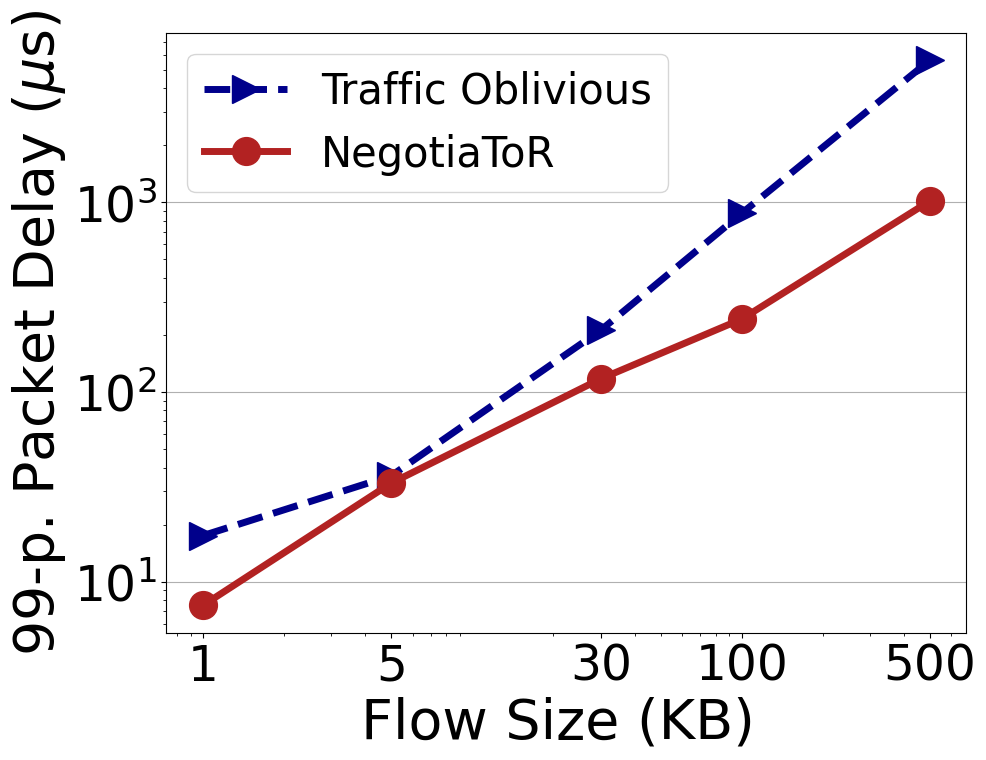

In [4]:

# labels = [5]
myfontsize = 40
print(result1_average)
print(result2_average)
plt.figure(figsize=(10,8))
plt.plot(labels, result[1], color = 'darkblue', marker = '>', markersize=20, linestyle = '--', linewidth=5, label = "Traffic Oblivious")
plt.plot(labels, result[0], color = 'firebrick', marker = 'o', markersize=20, linestyle = 'solid', linewidth=5, label = "NegotiaToR")
# plt.errorbar(labels,result2_average,yerr=result1_stdd,fmt='>--',ecolor='darkblue',color='darkblue', markersize=20, elinewidth=5,linewidth=5,capsize=20,label = "Traffic Oblivious")
# plt.errorbar(labels,result1_average,yerr=result2_stdd,fmt='o-',ecolor='firebrick',color='firebrick', markersize=20, elinewidth=5,linewidth=5,capsize=20,label = "NegotiaToR")
plt.xlabel("Flow Size (KB) ", fontsize=myfontsize)
plt.ylabel(r"99-p. Packet Delay ($\mu$s)", fontsize=myfontsize)
plt.xscale('log')

# plt.xticks([1, 15, 100, 3, 5, 30, 50], (r"$10^0$", 15, r"$10^2$", 3, 5, 30, 50), fontsize=myfontsize-5)
plt.xticks([1, 5, 30, 100, 500], (1, 5, 30, 100, 500), fontsize=myfontsize-5)
# plt.xticks([20, 40, 60, 80, 100], fontsize=myfontsize)

# plt.ylim([10**0, 0.5*10**3])
plt.yscale('log')
plt.yticks(fontsize=myfontsize-5)
plt.grid(axis='y')
plt.legend(loc = 'upper left' , fontsize=myfontsize-10)
# plt.title("Permutation", fontsize=myfontsize)
plt.subplots_adjust(left=0.16, right=0.96, bottom=0.15, top=0.9)


plt.savefig("../FIGS/NegotiaToR Figs/5/permutation-99src delay.pdf")


In [6]:
import numpy as np
# x = [[1,2,3],[4,5,6]]
# print(np.shape(x))
# print(x)
# print(np.shape([[1,2],[3,4]]))

# for i, j in x:
#     print(i)
#     print(j)

x = np.ndarray(0)
x = []
x.append(1)
x.append(1)
print(x)

[1, 1]
